<a href="https://colab.research.google.com/github/ZeroLeon/fast_ai/blob/master/%E2%80%9Cmy_own_classifier_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fast_AI Learning(Lesson 1)

##Data Processing and Inital Modeling

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate


In [0]:
folder = 'soup'
file = 'Chinese_soup.csv'

In [0]:
folder = 'chow_mein'
file = 'chow_mein.csv'

In [0]:
folder = 'udon'
file = 'udon.csv'

In [0]:
path = Path('/content/data1/noodles')
dest = path/folder


In [0]:
path = Path('/content/data1/noodles')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
!cd /content/data1/noodles

In [14]:
path.ls()

[PosixPath('/content/data1/noodles/Chinese_soup.csv'),
 PosixPath('/content/data1/noodles/udon'),
 PosixPath('/content/data1/noodles/udon.csv'),
 PosixPath('/content/data1/noodles/soup'),
 PosixPath('/content/data1/noodles/chow_mein.csv'),
 PosixPath('/content/data1/noodles/chow_mein')]

In [0]:
classes = ['soup','chow_mein','udon']

In [11]:
path = Path('/content/data1/noodles')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/file,dest,max_pics=200)

Error https://my.openrice.com/userphoto/Article/0/Q/000565C5DCBC8C1F4BC393j.jpg ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


In [83]:
for c in classes:
  print(c)
  verify_images(path/c,delete=True,max_size=500)

soup


chow_mein


udon


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [82]:
data.classes

['chow_mein', 'soup', 'udon']

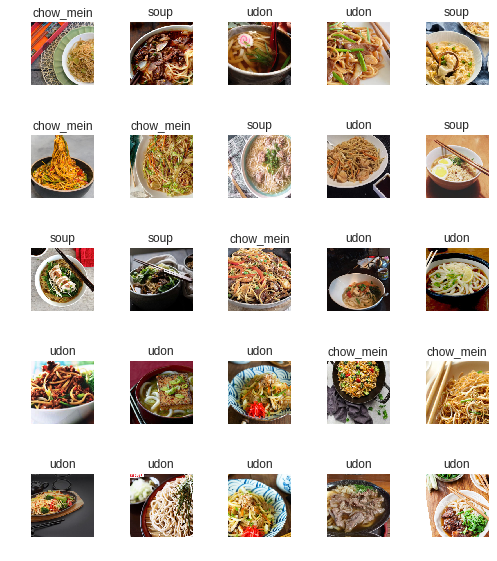

In [18]:
data.show_batch(row = 5,figsize=(7,8))

In [19]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['chow_mein', 'soup', 'udon'], 3, 384, 95)

In [21]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:01, 62664265.37it/s]


In [22]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.355095,1.022947,0.589474,00:10
1,0.985027,0.502220,0.263158,00:09
2,0.773458,0.441521,0.200000,00:09
3,0.654097,0.426246,0.200000,00:09


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

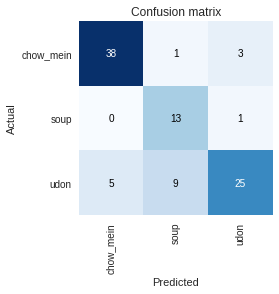

In [27]:
interp.plot_confusion_matrix()

In [28]:
interp.most_confused(min_val=2)

[('udon', 'soup', 9), ('udon', 'chow_mein', 5), ('chow_mein', 'udon', 3)]

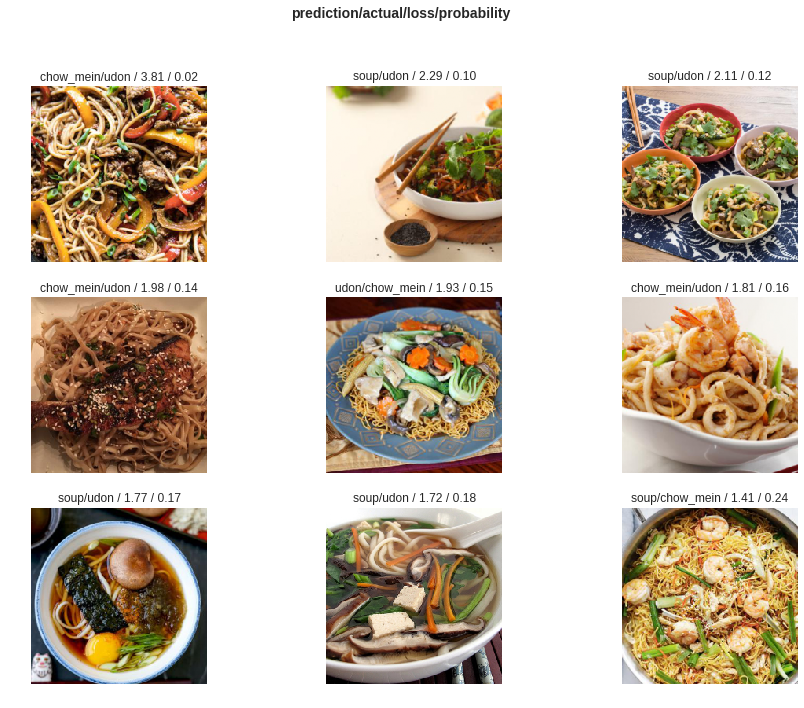

In [29]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)

In [0]:
learn.save('/content/data1/noodles/stage1')

In [0]:
from google.colab import files
files.download('/content/data1/noodles/stage1.pth')

##Inference

In [0]:
file_sample = 'udon_sample.jpg'

In [0]:
image = open_image(path/file_sample)

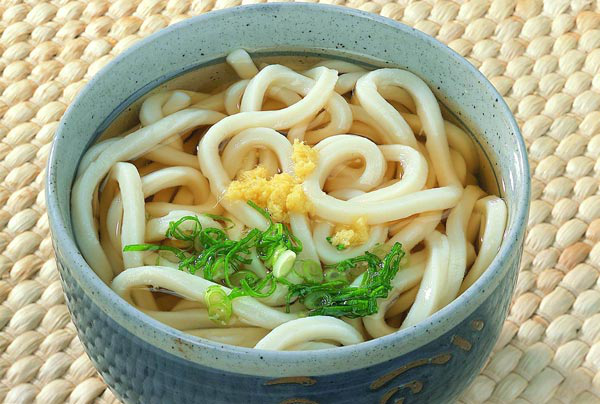

In [39]:
image

In [0]:
predic_class,pred_idx,outputs = learn.predict(image)

In [81]:
predic_class,pred_idx,outputs

(Category udon, tensor(2), tensor([0.0180, 0.0149, 0.9671]))

##Fine Tuning

In [0]:
learn.unfreeze

In [0]:
learn.lr_find()

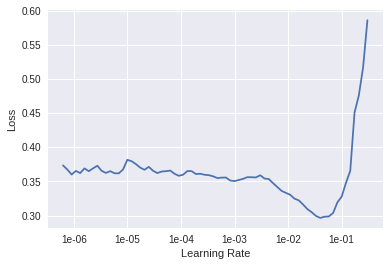

In [44]:
learn.recorder.plot()

In [47]:
learn.fit_one_cycle(2,max_lr=slice(3e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.247326,0.456038,0.200000,00:08
1,0.219260,0.433625,0.168421,00:09


In [0]:
learn.save('/content/data1/noodles/stage2')

In [0]:
files.download('/content/data1/noodles/stage2.pth')

##Interpretation

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

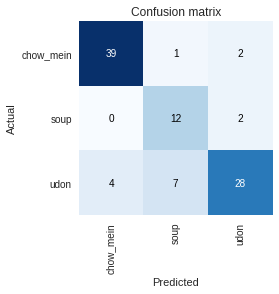

In [53]:
interp.plot_confusion_matrix()

In [55]:
interp.most_confused(min_val=2)

[('udon', 'soup', 7),
 ('udon', 'chow_mein', 4),
 ('chow_mein', 'udon', 2),
 ('soup', 'udon', 2)]

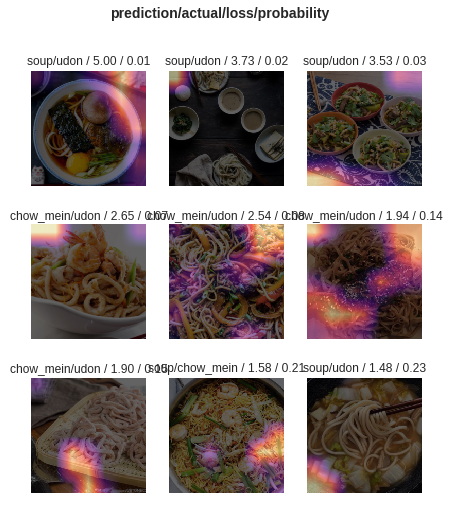

In [57]:
interp.plot_top_losses(9,figsize=(7,8),heatmap=True)

In [0]:
path2 = '/content/data1/noodles/chow_mein_sample.jpg'

In [0]:
img2 = open_image(path2)

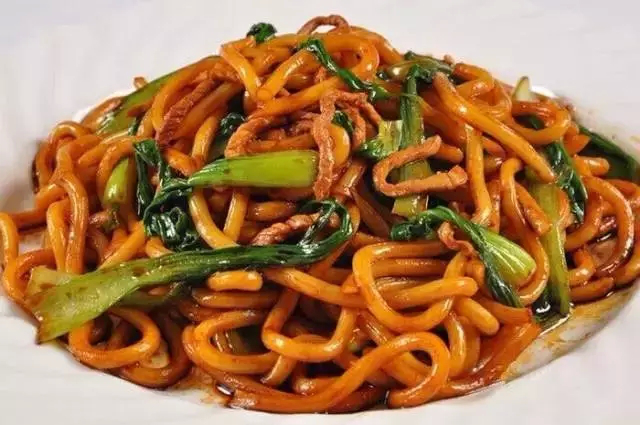

In [92]:
img2

In [0]:
pred_class,pred_idx,output = learn.predict(img2)

In [94]:
pred_class,pred_idx,output

(Category chow_mein, tensor(0), tensor([7.1819e-01, 6.4207e-06, 2.8180e-01]))

##Cleaning Up

In [0]:
learn.load('/content/data1/noodles/stage2')

In [0]:
from fastai.widgets import *
losses, idxs = interp.top_losses()


In [63]:
top_loss_paths = data.valid_ds.x(idxs)

TypeError: ignored

In [77]:
data.valid_ds.x

ImageList (95 items)
Image (3, 375, 500),Image (3, 500, 333),Image (3, 284, 284),Image (3, 333, 500),Image (3, 500, 500)
Path: /content/data1/noodles

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn)

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [0]:
path = 'content/data1/noodles'

In [0]:
ImageCleaner(ds, idxs,path)